<a href="https://colab.research.google.com/github/IT24102088/Plant-Disease-Detection-System-PG-NO-147/blob/main/Notebooks/Color_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Color Augmentation

Color augmentation (changes in brightness, contrast, saturation, hue, etc.) is important because lighting conditions, camera quality, and environment can cause large variations in how colors appear in real-world images. By applying these transformations during training, the model learns to focus on the essential features of the object instead of being overly sensitive to specific lighting or color settings.



*   Improves robustness against different lighting conditions.
*   Prevents overfitting to the exact color tones in the training dataset..

*   Enhances generalization so the model works well across diverse environments.

In short, color augmentation ensures the model recognizes objects regardless of lighting or color variations.






In [1]:
!pip install kaggle
import os
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''



In [2]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset" -p /content/drive/MyDrive/datasets/

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from IPython.display import clear_output
!unzip /content/drive/MyDrive/datasets/new-plant-diseases-dataset.zip
clear_output()

Image loaded! Shape: (256, 256, 3)
Value range: [0 to 229]


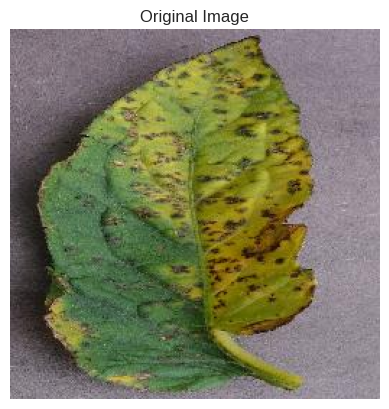

In [41]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


image_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/04fcd6e4-a96e-49ba-b67a-32b88337b505___GCREC_Bact.Sp 3689.JPG"

img = Image.open(image_path)
img_array = np.array(img)

print(f"Image loaded! Shape: {img_array.shape}")
print(f"Value range: [{img_array.min()} to {img_array.max()}]")

plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')
plt.show()

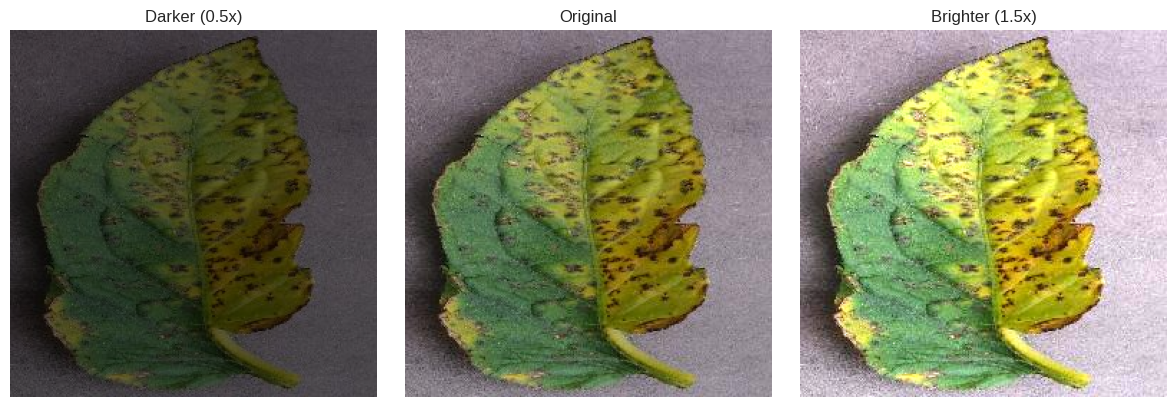

In [42]:

def adjust_brightness(image, factor):
    """Factor > 1.0 = brighter, Factor < 1.0 = darker"""

    image_float = image.astype(np.float32)
    brightened = np.clip(image_float * factor, 0, 255)
    return brightened.astype(np.uint8)


brighter = adjust_brightness(img_array, 1.5)
darker = adjust_brightness(img_array, 0.5)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(darker)
plt.title("Darker (0.5x)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_array)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(brighter)
plt.title("Brighter (1.5x)")
plt.axis('off')

plt.tight_layout()
plt.savefig('brightness_comparison.png', bbox_inches='tight')
plt.show()

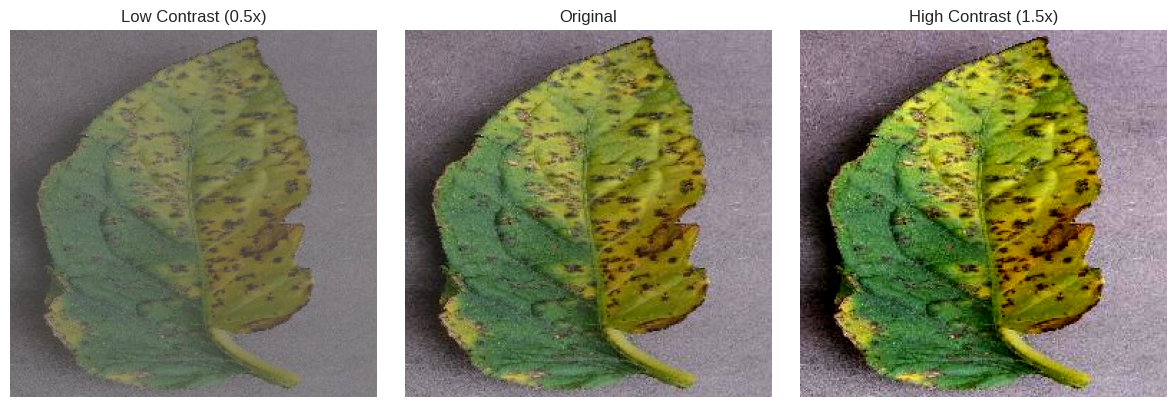

In [43]:

def adjust_contrast(image, factor):
    """Factor > 1.0 = more contrast, Factor < 1.0 = less contrast"""
    mean = image.mean()
    image_float = image.astype(np.float32)
    contrasted = np.clip(mean + factor * (image_float - mean), 0, 255)
    return contrasted.astype(np.uint8)


high_contrast = adjust_contrast(img_array, 1.5)
low_contrast = adjust_contrast(img_array, 0.5)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(low_contrast)
plt.title("Low Contrast (0.5x)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_array)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(high_contrast)
plt.title("High Contrast (1.5x)")
plt.axis('off')

plt.tight_layout()
plt.savefig('contrast_comparison.png', bbox_inches='tight')
plt.show()

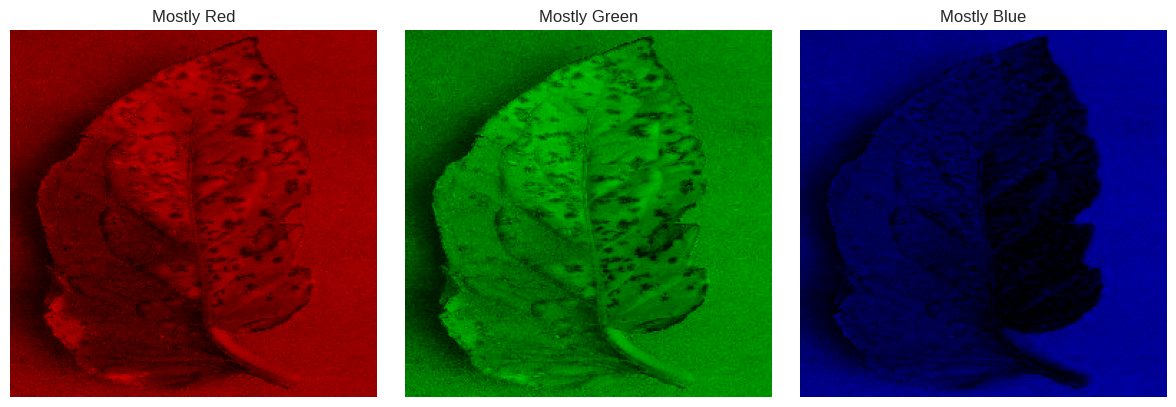

In [44]:

if len(img_array.shape) == 3:
    red_channel = img_array.copy()
    red_channel[:, :, 1] = 0  # Remove green
    red_channel[:, :, 2] = 0  # Remove blue

    green_channel = img_array.copy()
    green_channel[:, :, 0] = 0  # Remove red
    green_channel[:, :, 2] = 0  # Remove blue

    blue_channel = img_array.copy()
    blue_channel[:, :, 0] = 0  # Remove red
    blue_channel[:, :, 1] = 0  # Remove green

    # Show color channels
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(red_channel)
    plt.title("Mostly Red")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(green_channel)
    plt.title("Mostly Green")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(blue_channel)
    plt.title("Mostly Blue")
    plt.axis('off')

    plt.tight_layout()
    plt.savefig('color_channels.png', bbox_inches='tight')
    plt.show()
else:
    print("Image is grayscale - no color channels to manipulate")

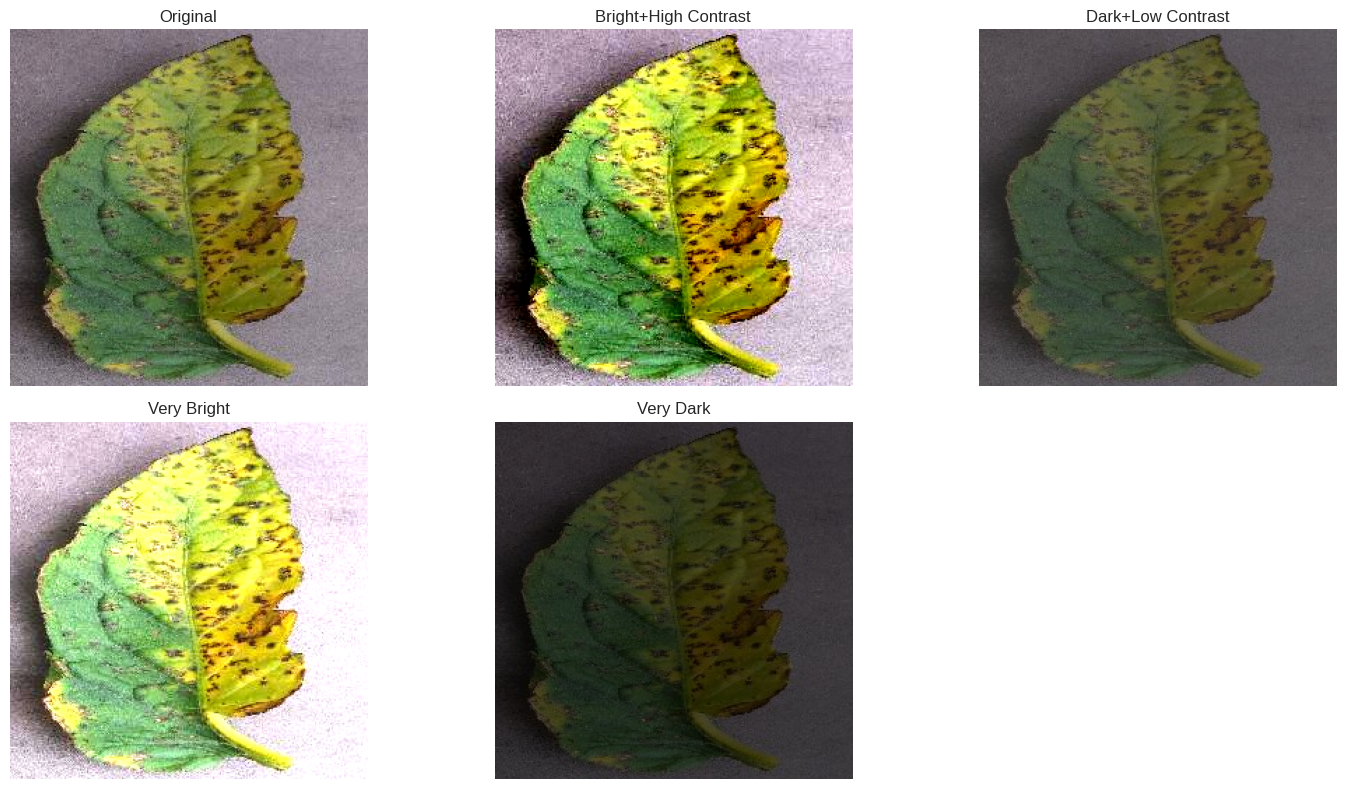

In [45]:
# Combine multiple color augmentations
def color_augment(image, brightness_factor=1.0, contrast_factor=1.0):
    """Apply multiple color transformations"""
    # Brightness
    augmented = adjust_brightness(image, brightness_factor)
    # Contrast
    augmented = adjust_contrast(augmented, contrast_factor)
    return augmented

# Create different combinations
augmentations = {
    'Original': img_array,
    'Bright+High Contrast': color_augment(img_array, 1.3, 1.5),
    'Dark+Low Contrast': color_augment(img_array, 0.7, 0.7),
    'Very Bright': color_augment(img_array, 1.8, 1.0),
    'Very Dark': color_augment(img_array, 0.4, 1.0)
}

# Show all augmentations
plt.figure(figsize=(15, 8))

for i, (name, augmented_img) in enumerate(augmentations.items()):
    plt.subplot(2, 3, i+1)
    plt.imshow(augmented_img)
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.savefig('color_augmentations_grid.png', bbox_inches='tight', dpi=120)
plt.show()

In [46]:
# Let's see what happens to the color statistics
print("Color Statistics for Different Augmentations:")
print("Format: (mean, standard deviation)")

for name, augmented_img in augmentations.items():
    if len(augmented_img.shape) == 3:
        # For color images, calculate stats per channel
        stats = []
        for channel in range(3):  # R, G, B channels
            channel_data = augmented_img[:, :, channel].flatten()
            stats.append(f"({channel_data.mean():.1f}, {channel_data.std():.1f})")
        print(f"{name:20} - R: {stats[0]}, G: {stats[1]}, B: {stats[2]}")
    else:
        # For grayscale images
        flat_data = augmented_img.flatten()
        print(f"{name:20} - Mean: {flat_data.mean():.1f}, Std: {flat_data.std():.1f}")

Color Statistics for Different Augmentations:
Format: (mean, standard deviation)
Original             - R: (115.7, 35.9), G: (116.7, 31.6), B: (85.6, 48.0)
Bright+High Contrast - R: (155.4, 68.6), G: (157.4, 60.0), B: (103.5, 84.5)
Dark+Low Contrast    - R: (78.0, 17.6), G: (78.5, 15.5), B: (63.3, 23.5)
Very Bright          - R: (201.4, 57.2), G: (205.3, 51.4), B: (150.3, 81.6)
Very Dark            - R: (45.9, 14.4), G: (46.3, 12.6), B: (33.9, 19.2)
